In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve

## 1) Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Exploratory Data Analysis.

In [3]:
import os
os.getcwd()

'C:\\Users\\ybhangal\\Downloads\\python\\DM-A3\\final'

In [4]:
df = pd.read_csv('insurance_part2_data.csv')
df.head()

Age Agency_Code           Type Claimed  Commision Channel  Duration  Sales  \
0   48         C2B       Airlines      No       0.70  Online         7   2.51   
1   36         EPX  Travel Agency      No       0.00  Online        34  20.00   
2   39         CWT  Travel Agency      No       5.94  Online         3   9.90   
3   36         EPX  Travel Agency      No       0.00  Online         4  26.00   
4   33         JZI       Airlines      No       6.30  Online        53  18.00   

        Product Name Destination  
0    Customised Plan        ASIA  
1    Customised Plan        ASIA  
2    Customised Plan    Americas  
3  Cancellation Plan        ASIA  
4        Bronze Plan        ASIA

In [5]:
df.describe().T

count       mean         std  min   25%    50%     75%      max
Age        3000.0  38.091000   10.463518  8.0  32.0  36.00  42.000    84.00
Commision  3000.0  14.529203   25.481455  0.0   0.0   4.63  17.235   210.21
Duration   3000.0  70.001333  134.053313 -1.0  11.0  26.50  63.000  4580.00
Sales      3000.0  60.249913   70.733954  0.0  20.0  33.00  69.000   539.00

In [6]:
df.Claimed.replace(('Yes', 'No'), (1, 0), inplace=True)

In [7]:
df.head()

Age Agency_Code           Type  Claimed  Commision Channel  Duration  \
0   48         C2B       Airlines        0       0.70  Online         7   
1   36         EPX  Travel Agency        0       0.00  Online        34   
2   39         CWT  Travel Agency        0       5.94  Online         3   
3   36         EPX  Travel Agency        0       0.00  Online         4   
4   33         JZI       Airlines        0       6.30  Online        53   

   Sales       Product Name Destination  
0   2.51    Customised Plan        ASIA  
1  20.00    Customised Plan        ASIA  
2   9.90    Customised Plan    Americas  
3  26.00  Cancellation Plan        ASIA  
4  18.00        Bronze Plan        ASIA

In [8]:
df.tail()

Age Agency_Code           Type  Claimed  Commision Channel  Duration  \
2995   28         CWT  Travel Agency        1     166.53  Online       364   
2996   35         C2B       Airlines        0      13.50  Online         5   
2997   36         EPX  Travel Agency        0       0.00  Online        54   
2998   34         C2B       Airlines        1       7.64  Online        39   
2999   47         JZI       Airlines        0      11.55  Online        15   

       Sales     Product Name Destination  
2995  256.20        Gold Plan    Americas  
2996   54.00        Gold Plan        ASIA  
2997   28.00  Customised Plan        ASIA  
2998   30.55      Bronze Plan        ASIA  
2999   33.00      Bronze Plan        ASIA

In [9]:
df.head()

Age Agency_Code           Type  Claimed  Commision Channel  Duration  \
0   48         C2B       Airlines        0       0.70  Online         7   
1   36         EPX  Travel Agency        0       0.00  Online        34   
2   39         CWT  Travel Agency        0       5.94  Online         3   
3   36         EPX  Travel Agency        0       0.00  Online         4   
4   33         JZI       Airlines        0       6.30  Online        53   

   Sales       Product Name Destination  
0   2.51    Customised Plan        ASIA  
1  20.00    Customised Plan        ASIA  
2   9.90    Customised Plan    Americas  
3  26.00  Cancellation Plan        ASIA  
4  18.00        Bronze Plan        ASIA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null int64
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 234.5+ KB


In [11]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [12]:
print('The number of rows (observations) is:',df.shape[0],'\n''The number of columns(variables) is:',df.shape[1])

The number of rows (observations) is: 3000 
The number of columns(variables) is: 10


In [13]:
df.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed           int64
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

<AxesSubplot:xlabel='Age'>

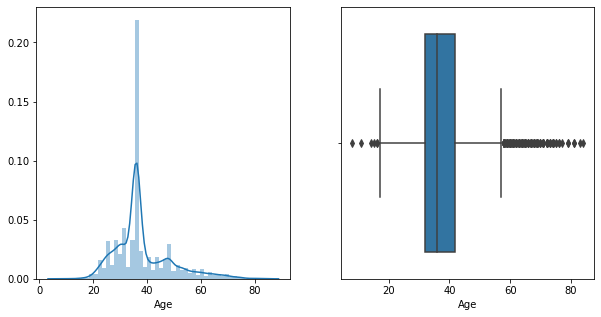

In [15]:
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.distplot(df.Age, kde=True, ax=axs[0]) 
sns.boxplot(x= 'Age', data=df, ax=axs[1])

<AxesSubplot:xlabel='Commision'>

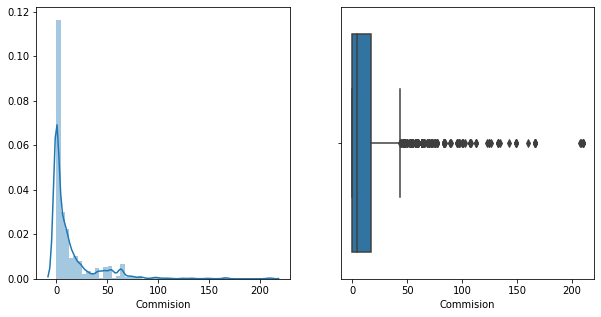

In [16]:
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.distplot(df.Commision, kde=True, ax=axs[0]) 
sns.boxplot(x= 'Commision', data=df, ax=axs[1])

<AxesSubplot:xlabel='Duration'>

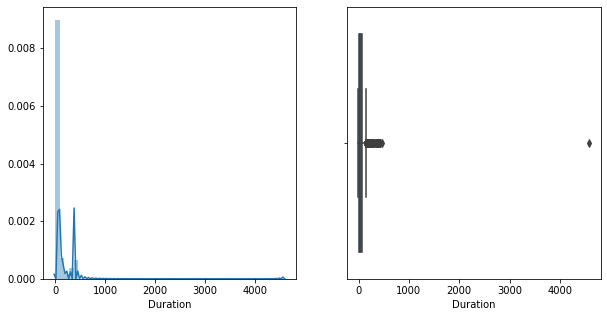

In [17]:
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.distplot(df.Duration, kde=True, ax=axs[0]) 
sns.boxplot(x= 'Duration', data=df, ax=axs[1])

<AxesSubplot:xlabel='Sales'>

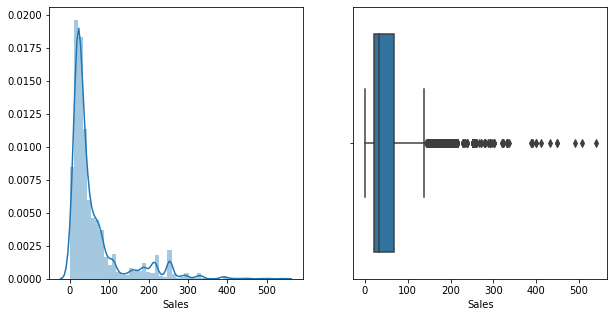

In [18]:
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.distplot(df.Sales, kde=True, ax=axs[0]) 
sns.boxplot(x= 'Sales', data=df, ax=axs[1])

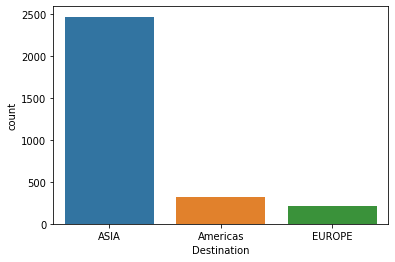

In [19]:
# count plot on single categorical variable
sns.countplot(x ='Destination', data = df)
plt.show()

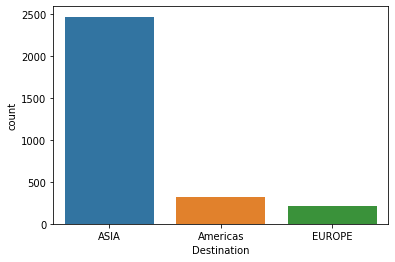

In [20]:
# count plot on single categorical variable
sns.countplot(x ='Destination', data = df)
plt.show()

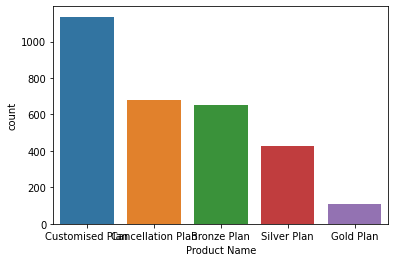

In [21]:
sns.countplot(x ='Product Name', data = df)
plt.show()

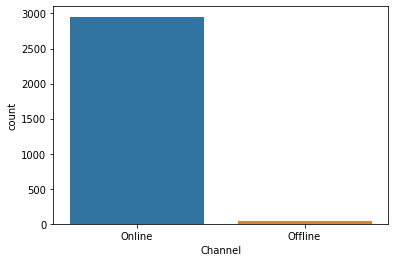

In [22]:
# count plot on single categorical variable
sns.countplot(x ='Channel', data = df)
plt.show()

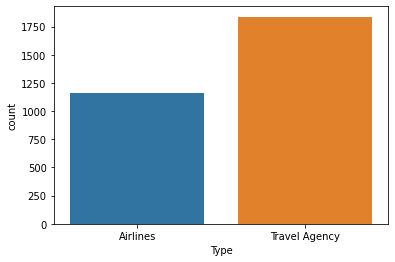

In [23]:
# count plot on single categorical variable
sns.countplot(x ='Type', data = df)
plt.show()

In [24]:
cat= []
num = []

In [25]:
for i in df.columns:
  if df[i].dtype == 'object':
    cat.append(i)
  else:
    num.append(i)

print(cat)
print(num)

['Agency_Code', 'Type', 'Channel', 'Product Name', 'Destination']
['Age', 'Claimed', 'Commision', 'Duration', 'Sales']


<AxesSubplot:>

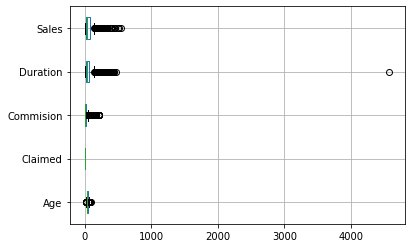

In [26]:
df[num].boxplot(vert=0)

In [27]:
def outlier_range(col):
  sorted(col)
  q1, q3 = np.percentile(col, [25,75])
  iqr = q3 - q1
  lower_range = q1 - (1.5*iqr)
  upper_range = q3 + (1.5*iqr)
  return lower_range,upper_range

In [28]:
lr , ur = outlier_range(df['Age'])
df['Age'] = np.where(df['Age'] > ur, ur, df['Age'])
df['Age'] = np.where(df['Age'] < lr, lr, df['Age'])

In [29]:
lr , ur = outlier_range(df['Commision'])
df['Commision'] = np.where(df['Commision'] > ur, ur, df['Commision'])
df['Commision'] = np.where(df['Commision'] < lr, lr, df['Commision'])

In [30]:
lr , ur = outlier_range(df['Duration'])
df['Duration'] = np.where(df['Duration'] > ur, ur, df['Duration'])
df['Duration'] = np.where(df['Duration'] < lr, lr, df['Duration'])

In [31]:
lr , ur = outlier_range(df['Sales'])
df['Sales'] = np.where(df['Sales'] > ur, ur, df['Sales'])
df['Sales'] = np.where(df['Sales'] < lr, lr, df['Sales'])

<AxesSubplot:>

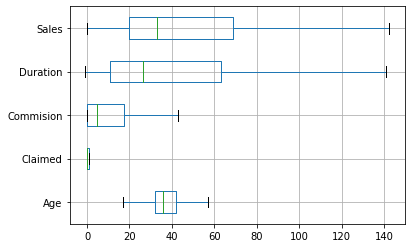

In [32]:
df[num].boxplot(vert=0)

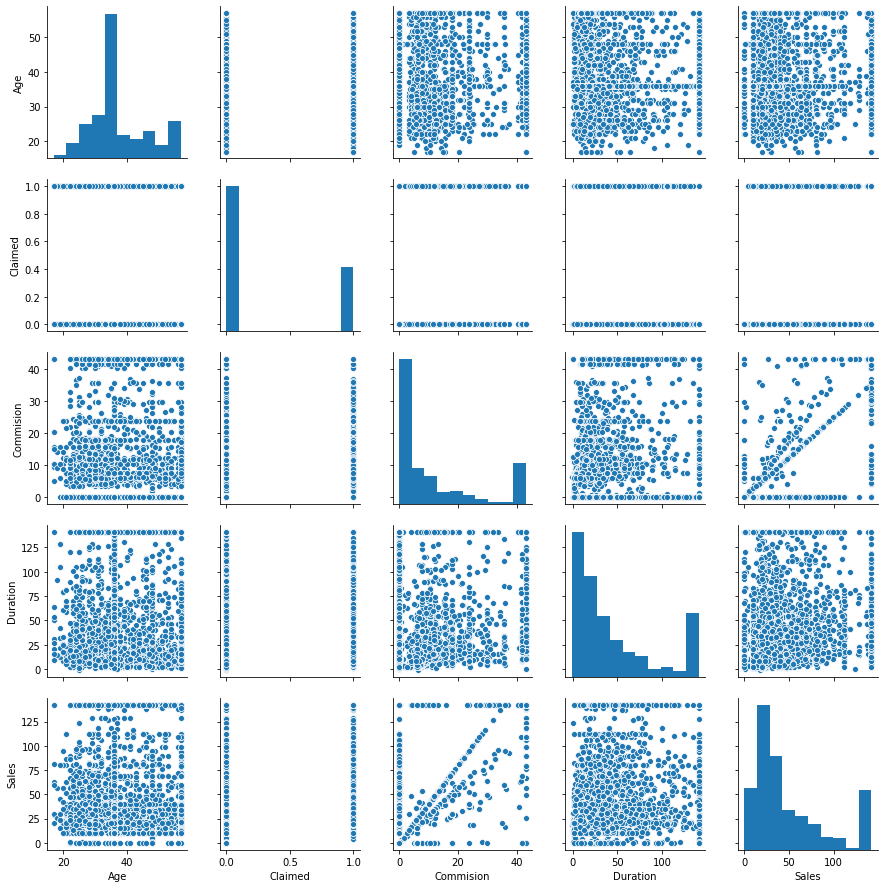

In [33]:
sns.pairplot(df)

In [34]:
corr = df.corr()
round(corr,2)

Age  Claimed  Commision  Duration  Sales
Age        1.00    -0.04       0.07      0.01   0.02
Claimed   -0.04     1.00       0.33      0.23   0.35
Commision  0.07     0.33       1.00      0.46   0.69
Duration   0.01     0.23       0.46      1.00   0.54
Sales      0.02     0.35       0.69      0.54   1.00

<AxesSubplot:>

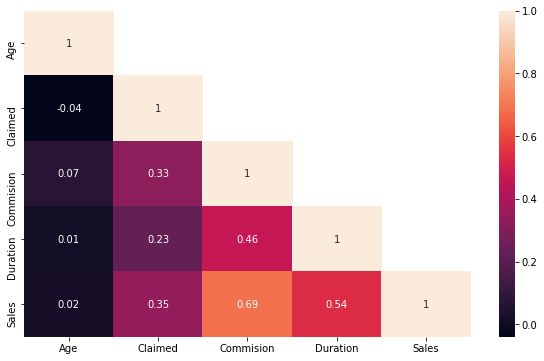

In [35]:
# Heat Map - Multivariate Analysis
fig_dims = (10, 6)
fig = plt.subplots(figsize=fig_dims)
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
sns.heatmap(round(corr,2), annot=True, mask=(np.triu(corr,+1)))

In [36]:
data = df.copy()
data.head()

Age Agency_Code           Type  Claimed  Commision Channel  Duration  \
0  48.0         C2B       Airlines        0       0.70  Online       7.0   
1  36.0         EPX  Travel Agency        0       0.00  Online      34.0   
2  39.0         CWT  Travel Agency        0       5.94  Online       3.0   
3  36.0         EPX  Travel Agency        0       0.00  Online       4.0   
4  33.0         JZI       Airlines        0       6.30  Online      53.0   

   Sales       Product Name Destination  
0   2.51    Customised Plan        ASIA  
1  20.00    Customised Plan        ASIA  
2   9.90    Customised Plan    Americas  
3  26.00  Cancellation Plan        ASIA  
4  18.00        Bronze Plan        ASIA

## 2) Data Split: Split the data into test(30% of the data) and train(70% of the data) Build the most optimum classification models : CART, Random Forest, Artificial Neural Network

In [37]:
# capture the target column ("default") into separate vectors for training set and test set

X = df.drop("Claimed" , axis=1)

Y = df.pop("Claimed")

In [38]:
# This line of code is to perform one hot encoding for Categorical Features
X = pd.get_dummies( X, drop_first = False )

In [39]:
list(X.columns)

['Age',
 'Commision',
 'Duration',
 'Sales',
 'Agency_Code_C2B',
 'Agency_Code_CWT',
 'Agency_Code_EPX',
 'Agency_Code_JZI',
 'Type_Airlines',
 'Type_Travel Agency',
 'Channel_Offline',
 'Channel_Online',
 'Product Name_Bronze Plan',
 'Product Name_Cancellation Plan',
 'Product Name_Customised Plan',
 'Product Name_Gold Plan',
 'Product Name_Silver Plan',
 'Destination_ASIA',
 'Destination_Americas',
 'Destination_EUROPE']

In [40]:
X.dtypes

Age                               float64
Commision                         float64
Duration                          float64
Sales                             float64
Agency_Code_C2B                     uint8
Agency_Code_CWT                     uint8
Agency_Code_EPX                     uint8
Agency_Code_JZI                     uint8
Type_Airlines                       uint8
Type_Travel Agency                  uint8
Channel_Offline                     uint8
Channel_Online                      uint8
Product Name_Bronze Plan            uint8
Product Name_Cancellation Plan      uint8
Product Name_Customised Plan        uint8
Product Name_Gold Plan              uint8
Product Name_Silver Plan            uint8
Destination_ASIA                    uint8
Destination_Americas                uint8
Destination_EUROPE                  uint8
dtype: object

In [41]:
X.head()

Age  Commision  Duration  Sales  Agency_Code_C2B  Agency_Code_CWT  \
0  48.0       0.70       7.0   2.51                1                0   
1  36.0       0.00      34.0  20.00                0                0   
2  39.0       5.94       3.0   9.90                0                1   
3  36.0       0.00       4.0  26.00                0                0   
4  33.0       6.30      53.0  18.00                0                0   

   Agency_Code_EPX  Agency_Code_JZI  Type_Airlines  Type_Travel Agency  \
0                0                0              1                   0   
1                1                0              0                   1   
2                0                0              0                   1   
3                1                0              0                   1   
4                0                1              1                   0   

   Channel_Offline  Channel_Online  Product Name_Bronze Plan  \
0                0               1                         0   
1                0               1                         0   
2                0               1                         0   
3                0               1                         0   
4                0               1                         1   

   Product Name_Cancellation Plan  Product Name_Customised Plan  \
0                               0                             1   
1                               0                             1   
2                               0                             1   
3                               1                             0   
4                               0                             0   

   Product Name_Gold Plan  Product Name_Silver Plan  Destination_ASIA  \
0                       0                         0                 1   
1                       0                         0                 1   
2                       0                         0                 0   
3                       0                         0                 1   
4                       0                         0                 1   

   Destination_Americas  Destination_EUROPE  
0                     0                   0  
1                     0                   0  
2                     1                   0  
3                     0                   0  
4                     0                   0

In [42]:
data1 = df.copy()
data1.head()

Age Agency_Code           Type  Commision Channel  Duration  Sales  \
0  48.0         C2B       Airlines       0.70  Online       7.0   2.51   
1  36.0         EPX  Travel Agency       0.00  Online      34.0  20.00   
2  39.0         CWT  Travel Agency       5.94  Online       3.0   9.90   
3  36.0         EPX  Travel Agency       0.00  Online       4.0  26.00   
4  33.0         JZI       Airlines       6.30  Online      53.0  18.00   

        Product Name Destination  
0    Customised Plan        ASIA  
1    Customised Plan        ASIA  
2    Customised Plan    Americas  
3  Cancellation Plan        ASIA  
4        Bronze Plan        ASIA

### Splitting the data 

In [43]:
 # Splitting data into training and test set for independent attributes
 from sklearn.model_selection import train_test_split
 X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30, random_state=1)

In [44]:
X_train.shape

(2100, 20)

In [45]:
X_test.shape

(900, 20)

### Decision Tree


In [46]:
from sklearn import tree

In [47]:
dt_model = tree.DecisionTreeClassifier(criterion = 'gini' )

In [48]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
CART_File = open('C:\\Users\\ybhangal\\Desktop\decision_tree.dot','w')

#Now that we have created the 'dot' file, we need to pass the appropriate parameters to export the graphical visualization.
train_char_label = ['No', 'Yes']
dot_data = tree.export_graphviz(dt_model, #passing the model that we had built earlier
                                out_file=CART_File, #the output should be saved in the 'dot' file that we created earlier
                                feature_names = list(X_train), #names of the independent variables
                                class_names = list(train_char_label)) #passing the names of the classes that we had defined

#After opening the dot file, all the instructions have been passed and written in the 'dot' file, so we will go ahead and 
#close the file
CART_File.close()

In [50]:
!pip install pydotplus
!pip install graphviz

In [51]:
import pydotplus

In [52]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/' #setting the path 
dot_data = tree.export_graphviz(dt_model, out_file=None,#passing the model built and setting the output to None as we do
                                #not need the dot file separately to visualize the graph
                        feature_names=list(X_train), #names of the independent variables 
                         class_names=list(train_char_label),  
                         filled=True) #colours the nodes for classification for the ease of visualization

graph = pydotplus.graph_from_dot_data(dot_data) #extracting the visuals from the above file to plot it

In [53]:
from IPython.display import Image
Image(graph.create_png())#creating '.png' file 

In [54]:
graph.write_jpeg("tree.jpeg")

True

In [55]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                     Imp
Age                             0.176111
Commision                       0.077414
Duration                        0.243654
Sales                           0.214477
Agency_Code_C2B                 0.195743
Agency_Code_CWT                 0.003445
Agency_Code_EPX                 0.002781
Agency_Code_JZI                 0.001075
Type_Airlines                   0.000000
Type_Travel Agency              0.000597
Channel_Offline                 0.002241
Channel_Online                  0.005531
Product Name_Bronze Plan        0.008428
Product Name_Cancellation Plan  0.016429
Product Name_Customised Plan    0.009915
Product Name_Gold Plan          0.010481
Product Name_Silver Plan        0.016076
Destination_ASIA                0.004703
Destination_Americas            0.005988
Destination_EUROPE              0.004911


In [56]:
pd.Series(dt_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

Duration                          0.243654
Sales                             0.214477
Agency_Code_C2B                   0.195743
Age                               0.176111
Commision                         0.077414
Product Name_Cancellation Plan    0.016429
Product Name_Silver Plan          0.016076
Product Name_Gold Plan            0.010481
Product Name_Customised Plan      0.009915
Product Name_Bronze Plan          0.008428
Destination_Americas              0.005988
Channel_Online                    0.005531
Destination_EUROPE                0.004911
Destination_ASIA                  0.004703
Agency_Code_CWT                   0.003445
Agency_Code_EPX                   0.002781
Channel_Offline                   0.002241
Agency_Code_JZI                   0.001075
Type_Travel Agency                0.000597
Type_Airlines                     0.000000
dtype: float64

In [57]:
#Train Data
dt_model.score(X_train,Y_train)

0.9828571428571429

In [58]:
#Test Data
dt_model.score(X_test,Y_test)

0.7188888888888889

The model is over fitted

In [59]:
#The following is a modified version of the above code where we tried create a dot file and visualize

#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/' #setting the path 
#dot_data = tree.export_graphviz(reg_dt_model, out_file=None,#passing the model built and setting the output to None as we do
#                                #not need the dot file separately to visualize the graph
#                         feature_names=list(X_train), #names of the independent variables 
#                         class_names=list(train_char_label),  
#                         filled=True) #colours the nodes for classification for the ease of visualization
#
#graph = pydotplus.graph_from_dot_data(dot_data) #extracting the visuals from the above file to plot it

NameError: name 'reg_dt_model' is not defined

In [ ]:
y_predict = dt_model.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, Y_train)

In [60]:
params = {'criterion':['gini', 'entropy'],
         'max_depth':[5,6,7,9,10,11,13,15,16],
          'min_samples_split':list(range(2,20)),
         "min_samples_leaf":list(range(1,20))}

In [61]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [62]:
grid_Dec = GridSearchCV(DecisionTreeClassifier(),param_grid=params,refit=True,verbose=1)
grid_Dec.fit(X_train, Y_train)

C:\Users\ybhangal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 6156 candidates, totalling 18468 fits


[Parallel(n_jobs=1)]: Done 18468 out of 18468 | elapsed:  1.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 9, 10, 11, 13, 15, 16],


In [63]:
grid_Dec.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [64]:
reg_dt_model = DecisionTreeClassifier(criterion='entropy',max_depth= 9,min_samples_leaf=19,min_samples_split=4)
reg_dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=19, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
grid_Dec.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [68]:
#claim_tree_regularized = open('C:\\Users\\ybhangal\\Desktop\claim_tree_regularized.dot','w')
#dot_data = tree.export_graphviz(reg_dt_model, out_file= claim_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

#claim_tree_regularized.close()

#print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort())

#The following is a modified version of the above code where we tried create a dot file and visualize

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/' #setting the path 
dot_data = tree.export_graphviz(reg_dt_model, out_file=None,#passing the model built and setting the output to None as we do
                                #not need the dot file separately to visualize the graph
                         feature_names=list(X_train), #names of the independent variables 
                         class_names=list(train_char_label),  
                         filled=True) #colours the nodes for classification for the ease of visualization

graph = pydotplus.graph_from_dot_data(dot_data) #extracting the visuals from the above file to plot it


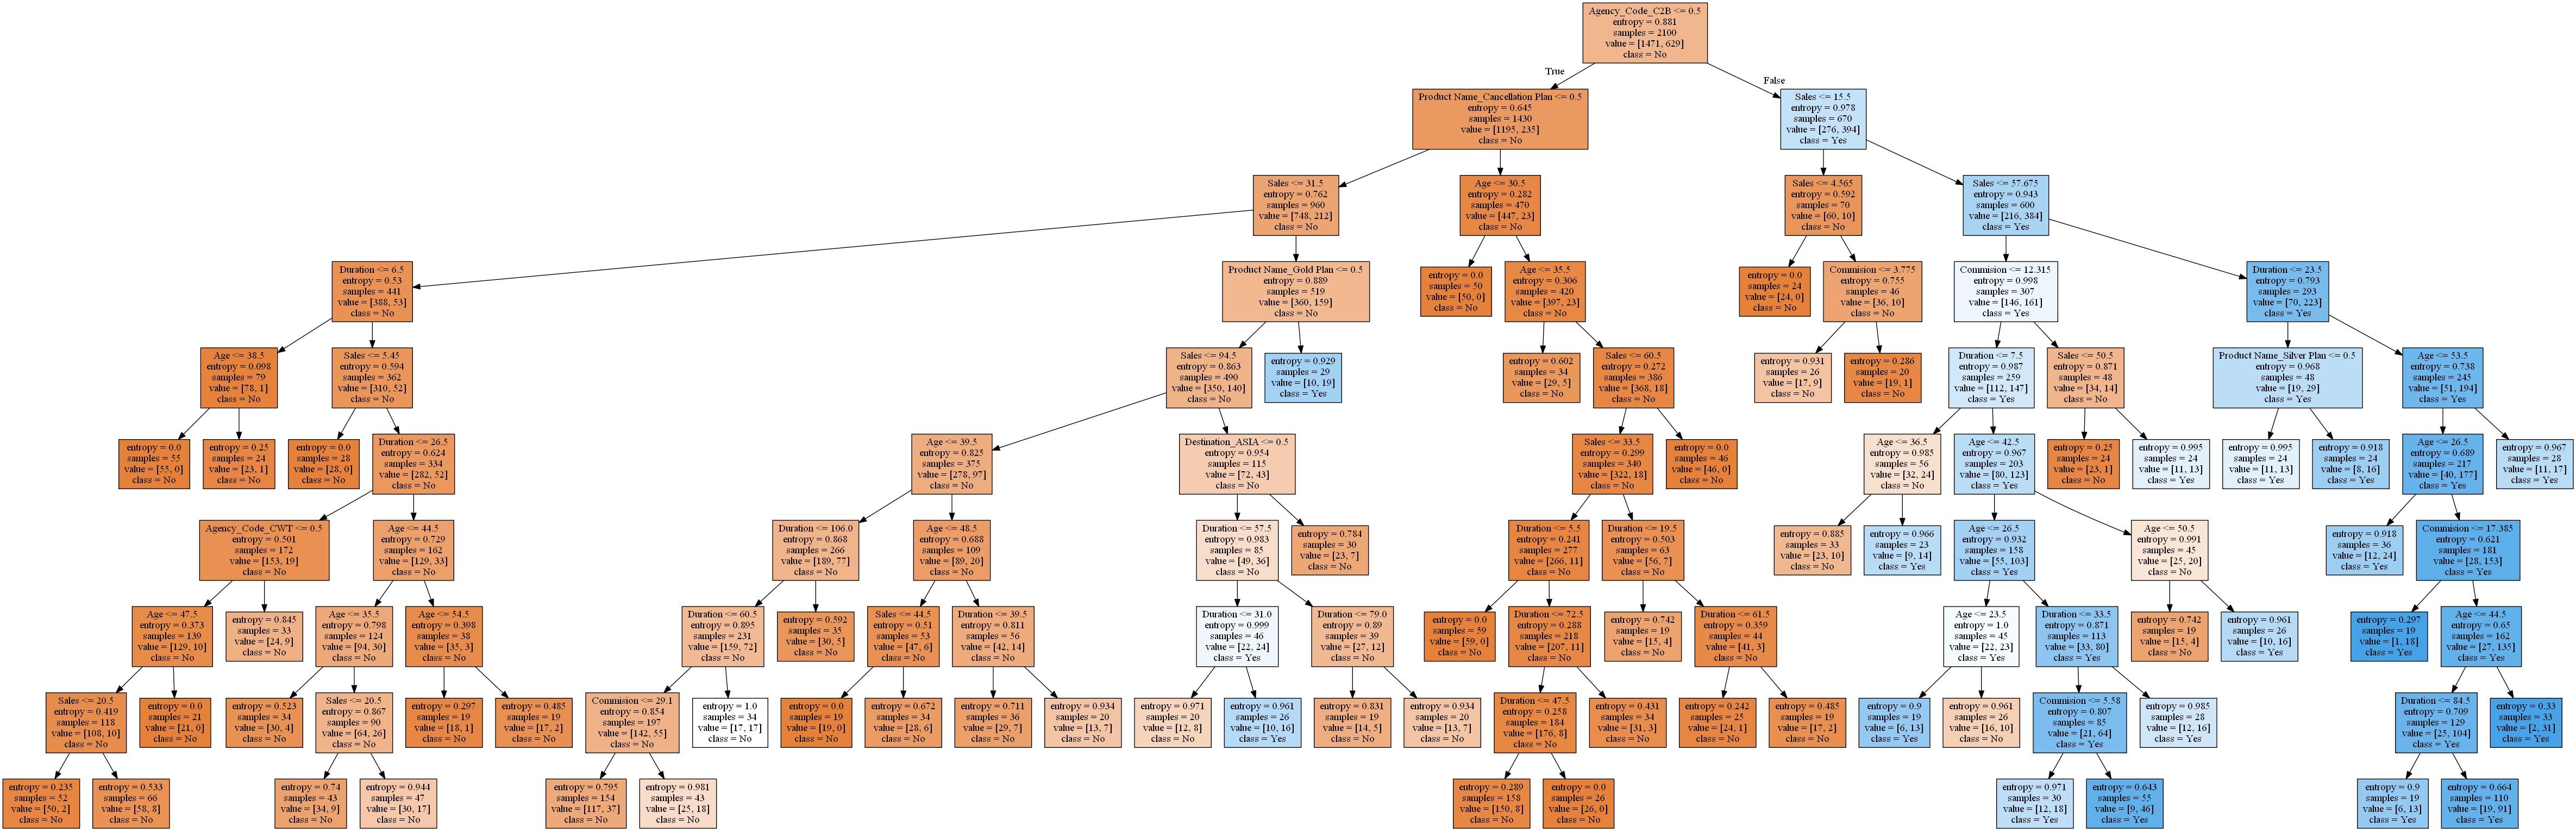

In [69]:
from IPython.display import Image
Image(graph.create_png())#creating '.png' file 

In [70]:
graph.write_jpeg("tree_pruned.jpeg")

True

In [71]:
pd.Series(reg_dt_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

Agency_Code_C2B                   0.428854
Sales                             0.242813
Product Name_Cancellation Plan    0.091269
Age                               0.088362
Duration                          0.079153
Commision                         0.036383
Product Name_Gold Plan            0.018033
Agency_Code_CWT                   0.010163
Destination_ASIA                  0.004078
Product Name_Silver Plan          0.000892
Agency_Code_JZI                   0.000000
Agency_Code_EPX                   0.000000
Destination_EUROPE                0.000000
Type_Airlines                     0.000000
Destination_Americas              0.000000
Channel_Offline                   0.000000
Channel_Online                    0.000000
Product Name_Bronze Plan          0.000000
Product Name_Customised Plan      0.000000
Type_Travel Agency                0.000000
dtype: float64

In [72]:
Y_train_predict_class = reg_dt_model.predict(X_train)
Y_test_predict_class = reg_dt_model.predict(X_test)

In [73]:
Y_train_predict_prob = reg_dt_model.predict_proba(X_train)
Y_test_predict_prob = reg_dt_model.predict_proba(X_test)

In [74]:
import matplotlib.pyplot as plt

AUC: 0.869


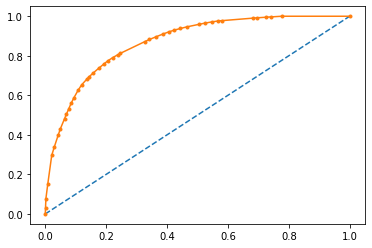

In [75]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.785


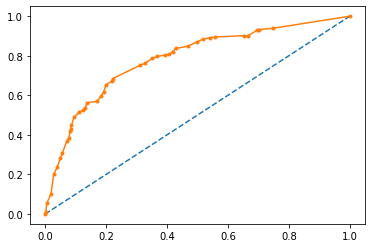

In [76]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [77]:
from sklearn import metrics

In [78]:
from sklearn.metrics import classification_report,confusion_matrix

#### Confusion Matrix for Train data

In [79]:
print(metrics.confusion_matrix(Y_train,Y_train_predict_class))

[[1312  159]
 [ 235  394]]


In [80]:
tn, fp, fn, tp = metrics.confusion_matrix(Y_train,Y_train_predict_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1312 
False Positives: 159 
False Negatives: 235 
True Positives: 394


In [81]:
print(metrics.classification_report(Y_train,Y_train_predict_class))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1471
           1       0.71      0.63      0.67       629

    accuracy                           0.81      2100
   macro avg       0.78      0.76      0.77      2100
weighted avg       0.81      0.81      0.81      2100



#### Confusion matrix for the test data.

In [82]:
print(metrics.confusion_matrix(Y_test,Y_test_predict_class))

[[548  57]
 [151 144]]


In [83]:
print(metrics.confusion_matrix(Y_test,Y_test_predict_class),'\n')
tn, fp, fn, tp = metrics.confusion_matrix(Y_test,Y_test_predict_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

[[548  57]
 [151 144]] 

True Negative: 548 
False Positives: 57 
False Negatives: 151 
True Positives: 144


In [84]:
print(metrics.classification_report(Y_test,Y_test_predict_class))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.72      0.49      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



#### Score for Train data

In [85]:
reg_dt_model.score(X_train,Y_train)

0.8123809523809524

#### Score for test data

In [86]:
reg_dt_model.score(X_test,Y_test)

0.7688888888888888

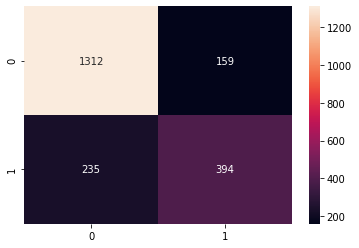

In [87]:
sns.heatmap(confusion_matrix(Y_train, Y_train_predict_class),annot=True,fmt='.4g');

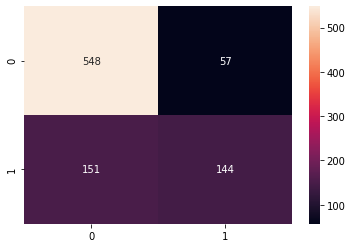

In [88]:
sns.heatmap(confusion_matrix(Y_test, Y_test_predict_class),annot=True,fmt='.4g');

### Random Forest

In [89]:
rfcl = RandomForestClassifier(random_state=1)


In [90]:
rfcl = rfcl.fit(X_train, Y_train)

C:\Users\ybhangal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [91]:
rfcl.score(X_train,Y_train)

0.9638095238095238

In [92]:
rfcl.score(X_test,Y_test)

0.76

In [93]:
pd.Series(rfcl.feature_importances_,index=X_train.columns).sort_values(ascending=False)

Duration                          0.244060
Age                               0.187099
Sales                             0.186309
Commision                         0.144718
Agency_Code_C2B                   0.060570
Product Name_Cancellation Plan    0.032908
Product Name_Silver Plan          0.026889
Type_Travel Agency                0.023340
Product Name_Customised Plan      0.018877
Type_Airlines                     0.015512
Agency_Code_JZI                   0.012674
Product Name_Gold Plan            0.008363
Destination_EUROPE                0.007124
Agency_Code_CWT                   0.006910
Destination_Americas              0.006770
Destination_ASIA                  0.006437
Product Name_Bronze Plan          0.004326
Channel_Offline                   0.003380
Channel_Online                    0.002295
Agency_Code_EPX                   0.001441
dtype: float64

In [94]:
# param_grid = {
#     'max_depth': [3,10],
#     'max_features': [2,4],
#     'min_samples_leaf': [10,100],
#     'min_samples_split': [50,300],
#     'n_estimators': [101,501]
# }
param_grid = {
    'max_depth': [5, 7],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [20, 50],
    'n_estimators': [301, 501]
}


In [95]:
#rfcl = RandomForestClassifier(random_state=1)
rfcl = RandomForestClassifier(random_state=1)

In [96]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [97]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [98]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 4,
 'min_samples_leaf': 100,
 'min_samples_split': 20,
 'n_estimators': 501}

In [99]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [100]:
best_model = grid_search.best_estimator_

In [101]:
#This code snippet for predicting the classes.
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [102]:
ytrain_predict_prob = best_model.predict_proba(X_train)
ytest_predict_prob = best_model.predict_proba(X_test)

We will start by checking the confusion matrix and then the classification report as well.

AUC: 0.810


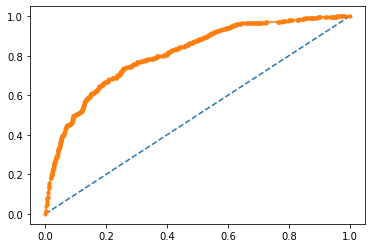

In [103]:
# AUC and ROC for the training data


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Y_train,ytrain_predict_prob[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,ytrain_predict_prob[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.785


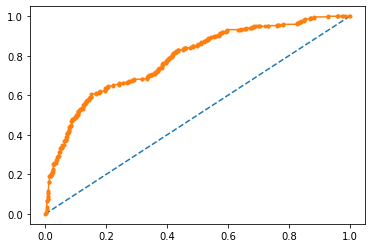

In [104]:
# AUC and ROC for the training data


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Y_test,ytest_predict_prob[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,ytest_predict_prob[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Confusion matrix for the train data.

In [105]:
print(metrics.confusion_matrix(Y_train,ytrain_predict))

[[1343  128]
 [ 338  291]]


In [106]:
tn, fp, fn, tp = metrics.confusion_matrix(Y_train,ytrain_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1343 
False Positives: 128 
False Negatives: 338 
True Positives: 291


In [107]:
print(metrics.classification_report(Y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1471
           1       0.69      0.46      0.56       629

    accuracy                           0.78      2100
   macro avg       0.75      0.69      0.70      2100
weighted avg       0.77      0.78      0.76      2100



#### Confusion matrix for the test data.

In [108]:
print(metrics.confusion_matrix(Y_test,ytest_predict))

[[567  38]
 [186 109]]


In [109]:
tn, fp, fn, tp = metrics.confusion_matrix(Y_train,ytrain_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1343 
False Positives: 128 
False Negatives: 338 
True Positives: 291


In [110]:
print(metrics.classification_report(Y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1471
           1       0.69      0.46      0.56       629

    accuracy                           0.78      2100
   macro avg       0.75      0.69      0.70      2100
weighted avg       0.77      0.78      0.76      2100



#### Score for Train Data

In [111]:
best_model.score(X_train,Y_train)

0.7780952380952381

#### Score for Test Data

In [112]:
best_model.score(X_test,Y_test)

0.7511111111111111

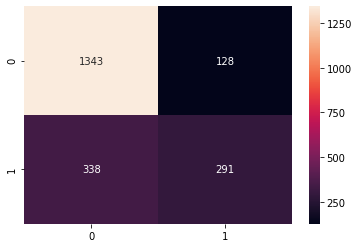

In [113]:
sns.heatmap(confusion_matrix(Y_train, ytrain_predict),annot=True,fmt='.4g');

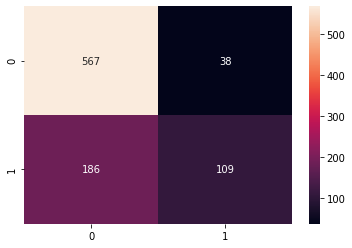

In [114]:
sns.heatmap(confusion_matrix(Y_test, ytest_predict),annot=True,fmt='.4g');

#### ANN

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
sc = StandardScaler()

In [117]:
X_train_scaled = sc.fit_transform(X_train)

In [118]:
X_train_scaled

array([[-0.16645631, -0.7582674 , -0.3406369 , ...,  0.47078709,
        -0.34641016, -0.28327886],
       [-0.16645631, -0.7582674 ,  2.04207264, ..., -2.1241024 ,
         2.88675135, -0.28327886],
       [-1.05932541,  2.05720719,  2.08579208, ...,  0.47078709,
        -0.34641016, -0.28327886],
       ...,
       [-0.16645631, -0.7582674 ,  1.86719488, ...,  0.47078709,
        -0.34641016, -0.28327886],
       [ 0.72641279, -0.34660531, -0.8652702 , ...,  0.47078709,
        -0.34641016, -0.28327886],
       [-0.16645631, -0.39038525,  0.86164773, ...,  0.47078709,
        -0.34641016, -0.28327886]])

In [119]:
X_test_scaled = sc.transform(X_test)

In [120]:
X_test_scaled

array([[-1.72897723,  1.10401345, -0.38435634, ..., -2.1241024 ,
        -0.34641016,  3.53009043],
       [ 1.95410779, -0.32504206, -0.47179523, ...,  0.47078709,
        -0.34641016, -0.28327886],
       [-0.94771677, -0.49689465, -0.27505774, ...,  0.47078709,
        -0.34641016, -0.28327886],
       ...,
       [-0.16645631, -0.31720088, -0.55923411, ...,  0.47078709,
        -0.34641016, -0.28327886],
       [ 1.28445597, -0.07216393,  0.24957555, ...,  0.47078709,
        -0.34641016, -0.28327886],
       [-0.27806495, -0.16364439, -0.84341048, ...,  0.47078709,
        -0.34641016, -0.28327886]])

In [121]:
clf = MLPClassifier(hidden_layer_sizes=10, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [122]:
clf.fit(X_train_scaled, Y_train)
y_test_pred = clf.predict(X_test_scaled)

Iteration 1, loss = 0.59855159
Iteration 2, loss = 0.58709016
Iteration 3, loss = 0.57384093
Iteration 4, loss = 0.56105761
Iteration 5, loss = 0.55035268
Iteration 6, loss = 0.54094711
Iteration 7, loss = 0.53318597
Iteration 8, loss = 0.52655185
Iteration 9, loss = 0.52115520
Iteration 10, loss = 0.51612704
Iteration 11, loss = 0.51203623
Iteration 12, loss = 0.50854714
Iteration 13, loss = 0.50545491
Iteration 14, loss = 0.50285170
Iteration 15, loss = 0.50044924
Iteration 16, loss = 0.49838014
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [123]:
#This code snippet is for predicting the classes.

ytrainpredict = clf.predict(X_train_scaled)
ytestpredict = clf.predict(X_test_scaled)

In [124]:
#This code snippet is for predicting the probabilites

ytrainpredict_prob =clf.predict_proba(X_train_scaled)
ytestpredict_prob = clf.predict_proba(X_test_scaled)

AUC: 0.794


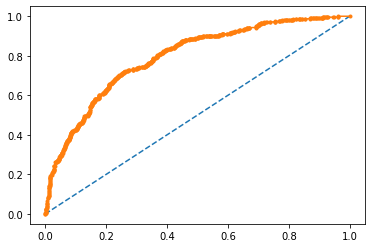

In [125]:
# AUC and ROC for the training data


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Y_train,ytrainpredict_prob[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,ytrainpredict_prob[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.790


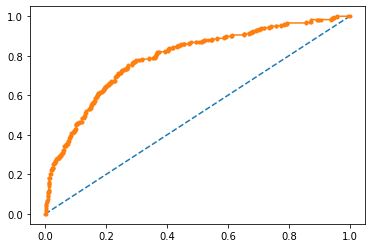

In [126]:
# AUC and ROC for the test data


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Y_test,ytestpredict_prob[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,ytestpredict_prob[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

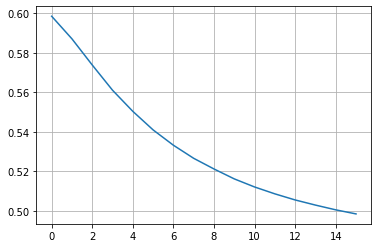

In [127]:
plt.plot(clf.loss_curve_)
plt.grid();

#### Confusion matrix for Train Data

In [128]:
print(metrics.confusion_matrix(Y_train,ytrainpredict))

[[1255  216]
 [ 294  335]]


In [129]:
tn, fp, fn, tp = metrics.confusion_matrix(Y_train,ytrainpredict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)
print(metrics.classification_report(Y_train,ytrainpredict))

True Negative: 1255 
False Positives: 216 
False Negatives: 294 
True Positives: 335
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1471
           1       0.61      0.53      0.57       629

    accuracy                           0.76      2100
   macro avg       0.71      0.69      0.70      2100
weighted avg       0.75      0.76      0.75      2100



#### Confusion matrix for Test Data

In [130]:
print(metrics.confusion_matrix(Y_test,ytestpredict))

[[541  64]
 [160 135]]


In [131]:
#Checking the accuracy on the test data

print(metrics.confusion_matrix(Y_test,ytestpredict),'\n')

tn, fp, fn, tp = metrics.confusion_matrix(Y_test,ytestpredict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')
print(metrics.classification_report(Y_test,ytestpredict))

[[541  64]
 [160 135]] 

True Negative: 541 
False Positives: 64 
False Negatives: 160 
True Positives: 135 

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       605
           1       0.68      0.46      0.55       295

    accuracy                           0.75       900
   macro avg       0.73      0.68      0.69       900
weighted avg       0.74      0.75      0.74       900



#### Score for Train data

In [132]:
clf.score(X_train_scaled,Y_train) #Accuracy Train

0.7571428571428571

#### Score for Test data

In [133]:
clf.score(X_test_scaled,Y_test) #Accuracy Test

0.7511111111111111

In [134]:
#Model Comparison
#Comparing Accuracies from all the models for Train and Test Sets. 
#[Print the accuracies of all the models for the Training and Test Set].
models=[reg_dt_model,best_model,clf]
models_names={reg_dt_model:'DecisionTreeClassifier',best_model:'RandomForestClassifier',clf:'ANN'}
for i in range(0, len(models)):
    if models[i]==clf:
        print('Accuracy Score for Train set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(Y_train, models[i].predict(X_train_scaled)),2)))
        print('Accuracy Score for Test set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(Y_test, models[i].predict(X_test_scaled)),2))  )
    else:
        print('Accuracy Score for Train set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(Y_train, models[i].predict(X_train)),2)))
        print('Accuracy Score for Test set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(Y_test, models[i].predict(X_test)),2))  )   

Accuracy Score for Train set for DecisionTreeClassifier is 0.81
Accuracy Score for Test set for DecisionTreeClassifier is 0.77
Accuracy Score for Train set for RandomForestClassifier is 0.78
Accuracy Score for Test set for RandomForestClassifier is 0.75
Accuracy Score for Train set for ANN is 0.76
Accuracy Score for Test set for ANN is 0.75


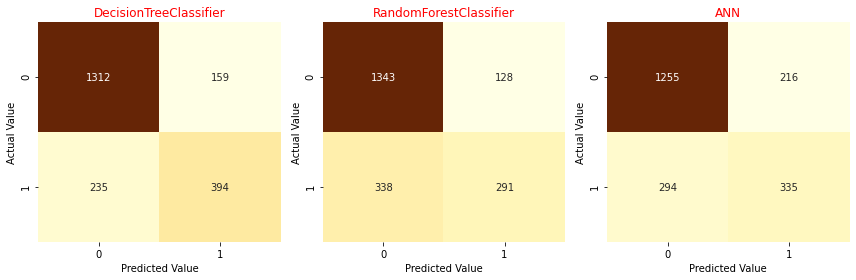

In [135]:
## Comparing Confusion Matrices from All the models for the Train Set. [Plot/Print the confusion matrices for all the training sets]. 
models=[reg_dt_model,best_model,clf]
models_names={reg_dt_model:'DecisionTreeClassifier',best_model:'RandomForestClassifier',clf:'ANN'}
fig=plt.figure(figsize=(12,4))
for i in range(0, len(models)):
    ax=fig.add_subplot(1,3,i+1)
    if models[i]==clf: 
        sns.heatmap(confusion_matrix(Y_train, models[i].predict(X_train_scaled)),annot=True, fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
    else: 
        sns.heatmap(confusion_matrix(Y_train, models[i].predict(X_train)),annot=True, fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
        
    #plt.title('Confusion Matrix for Predictions on Train set')
plt.tight_layout()

### 4) Final Model: Compare all the model and write an inference which model is best/optimized.

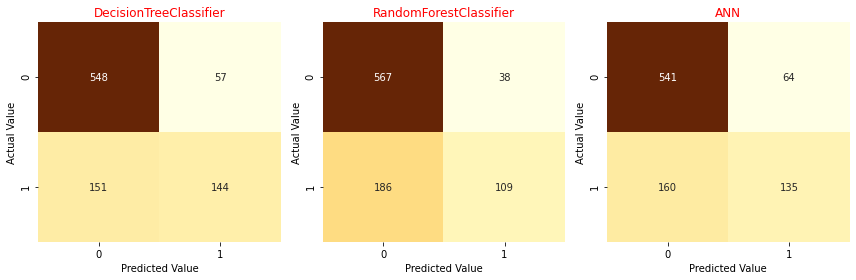

In [136]:
## Comparing Confusion Matrices from All the models for the Test Set. [Plot/Print the confusion matrices for all the test sets]. 
models=[reg_dt_model,best_model,clf]
models_names={reg_dt_model:'DecisionTreeClassifier',best_model:'RandomForestClassifier',clf:'ANN'}
fig=plt.figure(figsize=(12,4))
for i in range(0, len(models)):
    ax=fig.add_subplot(1,3,i+1)
    if models[i]==clf: 
        sns.heatmap(confusion_matrix(Y_test, models[i].predict(X_test_scaled)),annot=True, fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
    else: 
        sns.heatmap(confusion_matrix(Y_test, models[i].predict(X_test)),annot=True, fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
        
    #plt.title('Confusion Matrix for Predictions on Train set')
plt.tight_layout()